In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


6
9
9
4
1
1
2
7
8
3


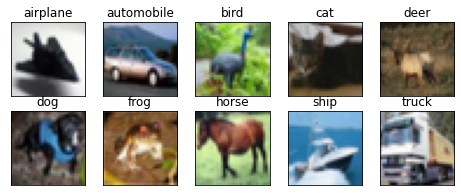

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
#next 使用一个迭代器对象，对可迭代对象按顺序遍历
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
for i,(img,lable) in enumerate(cifar10):    
    if i<10:
        print(lable)
plt.show()



/home/dutir_2t/liuxudong/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


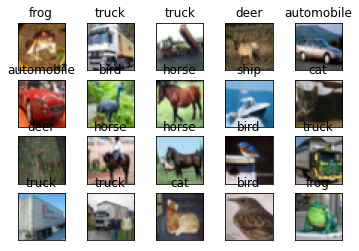

In [4]:
fig=plt.figure('img')
#查看前num个img的图像和对应的标签
num=20
for i ,(img,lable) in enumerate(cifar10):
    if(i<num):
        ax = fig.add_subplot(4, num/4, 1 + i, xticks=[], yticks=[])
        ax.set_title(class_names[lable])
        plt.imshow(img)
plt.show()

In [5]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [6]:
len(cifar10)
#cifar10包含50000个带标签的图片数据

50000

In [7]:
def cifar10_get_index(a,b):
    return list(cifar10[i] for i in range(a,b))
print(cifar10_get_index(0,2))    
print(cifar10[0])
print(cifar10[1])
#可以看出使用cifar10类似于tuple的list，tuple的每个元素都由使用PIL存储的图片和对应的标签组成的

[(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7FF5654278>, 6), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7F5AB55048>, 9)]
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7F5ACCF748>, 6)
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7F5ACCF748>, 9)


In [8]:
img, label = cifar10[99]
print(type(img))
#图片是PIL.Image.Image类的对象
img, label, class_names[label]

<class 'PIL.Image.Image'>


(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7F5AB54978>,
 1,
 'automobile')

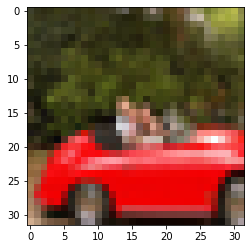

In [9]:
plt.imshow(img)
plt.show()

In [10]:
from torchvision import transforms
dir(transforms)
#查看transforms的属性和方法

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [11]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [12]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())
#将cifar10转换为tensor形式，其中RGB格式的图片值应当为0~255 经过归一化后处理得到tensor的值
print('transform ok')

transform ok


In [13]:
img_t, label = tensor_cifar10[99]
type(img_t)
print(img_t)
print(label)

tensor([[[0.2431, 0.1961,  ..., 0.7176, 0.5373],
         [0.2471, 0.2157,  ..., 0.6706, 0.5686],
         ...,
         [0.7176, 0.5882,  ..., 0.5294, 0.5608],
         [0.8196, 0.7137,  ..., 0.5098, 0.6627]],

        [[0.2510, 0.1961,  ..., 0.7216, 0.5333],
         [0.2549, 0.2078,  ..., 0.6824, 0.5725],
         ...,
         [0.5725, 0.4627,  ..., 0.4627, 0.4902],
         [0.6824, 0.5922,  ..., 0.4667, 0.6118]],

        [[0.1725, 0.1020,  ..., 0.2980, 0.2824],
         [0.1451, 0.1020,  ..., 0.2941, 0.3020],
         ...,
         [0.4588, 0.3725,  ..., 0.3843, 0.4314],
         [0.5647, 0.4824,  ..., 0.4353, 0.6275]]])
1


In [14]:
img_t.shape, img_t.dtype
#3代表通道数，3个通道是RGB 32*32代表像素点数，归一化得到的值是float型

(torch.Size([3, 32, 32]), torch.float32)

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [16]:
a=np.array([[1.1,1.2],[2.2,3.1]])
b=torch.from_numpy(a)
print(b)
print(b.shape)
print(b.min())
print(b.max())
print(b.min().shape)

tensor([[1.1000, 1.2000],
        [2.2000, 3.1000]], dtype=torch.float64)
torch.Size([2, 2])
tensor(1.1000, dtype=torch.float64)
tensor(3.1000, dtype=torch.float64)
torch.Size([])


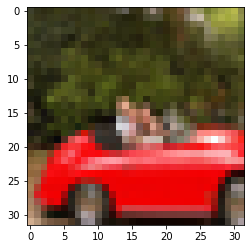

In [17]:
plt.imshow(img_t.permute(1, 2, 0))  # 将tensor的维度换维  PLT包显示图片时，使用的数据是高度宽度和通道
plt.show()

In [18]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
print(imgs.shape)


torch.Size([3, 32, 32, 50000])


In [19]:
print(imgs.view(3,-1).shape)
#ppt上说时3*1024 实际上说的是单个tenosr使用view处理的结果，实际上是1024*50000且在imgs.view中每个img  RGB的1024个像素点并不相邻
imgs.view(3, -1).mean(dim=1)  # <1>

torch.Size([3, 51200000])


tensor([0.4915, 0.4823, 0.4468])

In [20]:
#计算第一维度的方差
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [22]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             [0.2470, 0.2435, 0.2616])
    ]))

In [23]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


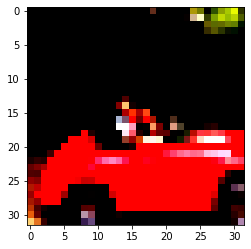

In [24]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()
#由于经过标准化之后的数值的取值范围和plt包要求的范围有差别所以会出现图像失真的情况